# Mixture Model

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import torch
import pyro
from pyro.distributions import Normal, Cauchy, Exponential

sys.path.append("..")
import benchmark
from benchmark.mixture_model import MixtureModelSimulator

## Build mixture model

In [2]:
distributions = [Normal, Cauchy, Exponential]

sim = MixtureModelSimulator(distributions)

In [3]:
def make_input(n_samples, weights, normal_params, cauchy_params, exp_params):
    theta = list(weights) + list(normal_params) + list(cauchy_params) + list(exp_params)
    return torch.tensor(n_samples * [theta])

theta = make_input(100000, [0.5, 0.3, 0.2], [2.,0.6], [4., 0.4], [0.5])

## Simulate data

In [4]:
x = sim(theta)
x.size()

torch.Size([100000, 1])

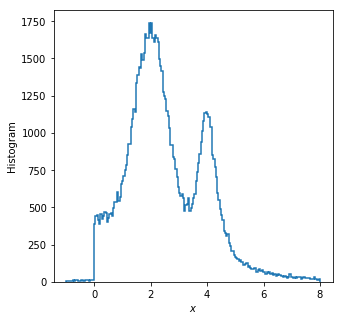

In [5]:
fig = plt.figure(figsize=(5,5))

plt.hist(x.data.flatten(), range=(-1.,8.), bins=200, histtype="step", lw=1.5)

plt.xlabel("$x$")
plt.ylabel(r"Histogram")

plt.show()

## True likelihood

In [6]:
log_p = sim.log_prob(theta, x)

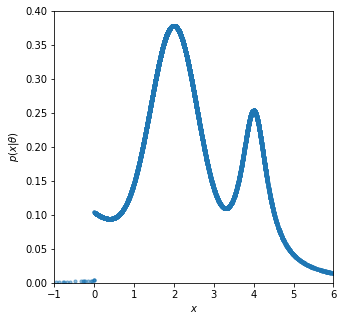

In [7]:
skip = 10

fig = plt.figure(figsize=(5,5))

plt.scatter(
    x.data.flatten()[::skip],
    np.exp(log_p.data.flatten()[::skip]),
    s=10.,
    alpha=0.5
)

plt.xlim(-1.,6.)
plt.ylim(0., 0.4)

plt.xlabel("$x$")
plt.ylabel(r"$p(x | \theta)$")

plt.show()

## Trace info

In [10]:
support = distributions[2].support.check(x).to(torch.float64)

In [11]:
support.size()

torch.Size([100000, 1])